# Reference Websites

https://towardsdatascience.com/seizure-classification-d0bb92d19962
   

https://github.com/Mr-Jree/Epileptic-Seizure-Binary-Classification/blob/master/Seizure%20Binary%20Classfication%20Notebook.ipynb
    
If need ideas for visualizations: https://github.com/simonbcodes/seizure-dataset/blob/master/Seizure%20Visualizations.ipynb

Nice slides: https://github.com/Mr-Jree/Epileptic-Seizure-Binary-Classification/blob/master/Seizure%20Binary%20Classification%20Slides.pdf

# Imports

In [1]:
import numpy as np
import bamboolib as bam
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import datasets, layers, models

# Read In

In [2]:
df=pd.read_csv('data.csv')

In [3]:
df = df.rename(columns={'Unnamed: 0': 'Sample'})
df.head()

,Sample,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X170,X171,X172,X173,X174,X175,X176,X177,X178,y
0,X21.V1.791,135,190,229,223,192,125,55,-9,-33,...,-17,-15,-31,-77,-103,-127,-116,-83,-51,4
1,X15.V1.924,386,382,356,331,320,315,307,272,244,...,164,150,146,152,157,156,154,143,129,1
2,X8.V1.1,-32,-39,-47,-37,-32,-36,-57,-73,-85,...,57,64,48,19,-12,-30,-35,-35,-36,5
3,X16.V1.60,-105,-101,-96,-92,-89,-95,-102,-100,-87,...,-82,-81,-80,-77,-85,-77,-72,-69,-65,5
4,X20.V1.54,-9,-65,-98,-102,-78,-48,-16,0,-21,...,4,2,-12,-32,-41,-65,-83,-89,-73,5


## Column Name Cleaning

In [4]:
df['seconds']=df.Sample.str.extract(r'(\d{1,2})')
df

,Sample,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X171,X172,X173,X174,X175,X176,X177,X178,y,seconds
0,X21.V1.791,135,190,229,223,192,125,55,-9,-33,...,-15,-31,-77,-103,-127,-116,-83,-51,4,21
1,X15.V1.924,386,382,356,331,320,315,307,272,244,...,150,146,152,157,156,154,143,129,1,15
2,X8.V1.1,-32,-39,-47,-37,-32,-36,-57,-73,-85,...,64,48,19,-12,-30,-35,-35,-36,5,8
3,X16.V1.60,-105,-101,-96,-92,-89,-95,-102,-100,-87,...,-81,-80,-77,-85,-77,-72,-69,-65,5,16
4,X20.V1.54,-9,-65,-98,-102,-78,-48,-16,0,-21,...,2,-12,-32,-41,-65,-83,-89,-73,5,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11495,X22.V1.114,-22,-22,-23,-26,-36,-42,-45,-42,-45,...,16,12,5,-1,-18,-37,-47,-48,2,22
11496,X19.V1.354,-47,-11,28,77,141,211,246,240,193,...,-33,-7,14,27,48,77,117,170,1,19
11497,X8.V1.28,14,6,-13,-16,10,26,27,-9,4,...,-48,-61,-62,-67,-30,-2,-1,-8,5,8
11498,X10.V1.932,-40,-25,-9,-12,-2,12,7,19,22,...,135,148,143,116,86,68,59,55,3,10


## Drop X in Column Names

In [5]:
#Drop X in column Names so that we can try and set values of Columns to time-series. 
def drop_prefix(self, prefix):
    self.columns = self.columns.str.lstrip(prefix)
    return self

pd.core.frame.DataFrame.drop_prefix = drop_prefix

In [6]:
df=df.drop_prefix('X')
#df.head()

## Change to Binary Response (Seizure or Not Seizure)

In [7]:
df['patient']=df.Sample.str.extract(r'(V\d{,2}.\d{,3})')
df['y'] = df['y'].replace([2, 3, 4, 5], 0)
#df

## Separate X features from y response

In [8]:
df_timeseries=df.drop(columns=['Sample'])

In [9]:
df_timeseries
df_timeseries['seconds'] = df_timeseries['seconds'].astype(float, errors='ignore')
df_timeseries['seconds'] = df_timeseries['seconds']/178
#df_timeseries

In [10]:
dff=df_timeseries.set_index(['patient','seconds'])
dff

dfj=dff.sort_values(by=['patient','seconds'])

dg=dfj.unstack(level=1)
dg.columns = dg.columns.swaplevel(0, 1)

dg.columns = [".".join([str(index) for index in multi_index]) for multi_index in dg.columns.ravel()]
dg = dg.reset_index()
dg

,patient,0.0056179775280898875.1,0.011235955056179775.1,0.016853932584269662.1,0.02247191011235955.1,0.028089887640449437.1,0.033707865168539325.1,0.03932584269662921.1,0.0449438202247191.1,0.05056179775280899.1,...,0.07865168539325842.y,0.08426966292134831.y,0.0898876404494382.y,0.09550561797752809.y,0.10112359550561797.y,0.10674157303370786.y,0.11235955056179775.y,0.11797752808988764.y,0.12359550561797752.y,0.12921348314606743.y
0,V1,12,-41,-45,68,-59,92,14,50,-24,...,0,0,0,0,0,0,0,0,0,0
1,V1.1,-56,-91,-61,-125,-60,-12,-113,-32,-39,...,0,0,0,0,0,0,0,0,0,0
2,V1.10,14,41,25,-58,-15,2,-9,-25,32,...,0,0,0,0,0,0,0,0,0,0
3,V1.101,-159,253,124,5,-135,-120,33,23,-23,...,0,0,0,0,0,0,0,0,0,0
4,V1.102,34,-16,-22,9,-39,-19,-29,-38,-5,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,V1.994,23,-75,-186,35,-38,-379,-230,510,126,...,1,1,1,1,1,1,1,1,1,1
496,V11,-24,-1,-11,54,17,17,64,-102,-50,...,0,0,0,0,0,0,0,0,0,0
497,V12,-42,-29,-90,-31,-39,-52,-57,-5,-14,...,0,0,0,0,0,0,0,0,0,0
498,V13,34,12,48,12,35,-13,6,36,95,...,0,0,0,0,0,0,0,0,0,0


In [17]:
listtodrop=dg.columns[4096:4118]
dg=dg.drop(columns=listtodrop)


In [18]:
ll=list(range(0,4096))

dg.columns=ll

dg.columns = [str(column) for column in dg.columns]
dg = dg.rename(columns={'0': 'patient'})
dg = dg.rename(columns={'4095': 'y'})
dg

,patient,1,2,3,4,5,6,7,8,9,...,4086,4087,4088,4089,4090,4091,4092,4093,4094,y
0,V1,12,-41,-45,68,-59,92,14,50,-24,...,14,-19,-27,-69,10,14,-34,-9,-28,0
1,V1.1,-56,-91,-61,-125,-60,-12,-113,-32,-39,...,-22,-49,-47,-158,-86,40,-32,-18,-180,0
2,V1.10,14,41,25,-58,-15,2,-9,-25,32,...,-46,-46,-29,13,6,0,21,-91,-40,0
3,V1.101,-159,253,124,5,-135,-120,33,23,-23,...,168,-82,-117,46,-207,62,-77,-50,-100,0
4,V1.102,34,-16,-22,9,-39,-19,-29,-38,-5,...,-36,-5,9,5,11,-1,-13,13,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,V1.994,23,-75,-186,35,-38,-379,-230,510,126,...,-287,-249,423,50,236,417,87,180,-272,1
496,V11,-24,-1,-11,54,17,17,64,-102,-50,...,0,10,86,17,-34,-22,30,79,23,0
497,V12,-42,-29,-90,-31,-39,-52,-57,-5,-14,...,9,-17,-48,-69,-45,-132,1,-107,-29,0
498,V13,34,12,48,12,35,-13,6,36,95,...,8,19,53,64,-11,81,9,58,45,0


In [19]:
Xx = dg.drop(columns=[ 'y',  'patient']) #changed this to Xx so could scale
y=dg[['y']]

## Graph some data

In [21]:
Xy=Xx.values

Text(0.5, 0, 'Time')

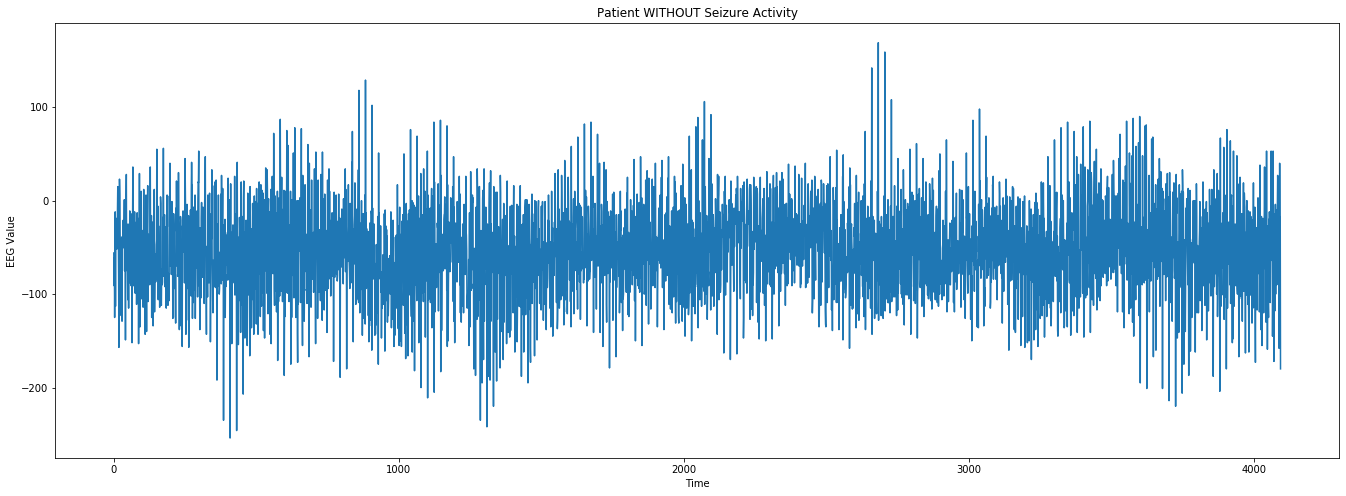

In [22]:
plt.figure(figsize=(23,8))
plt.plot(Xy[1,:])
plt.title('Patient WITHOUT Seizure Activity')
plt.ylabel('EEG Value')
plt.xlabel('Time')

Text(0.5, 0, 'Time')

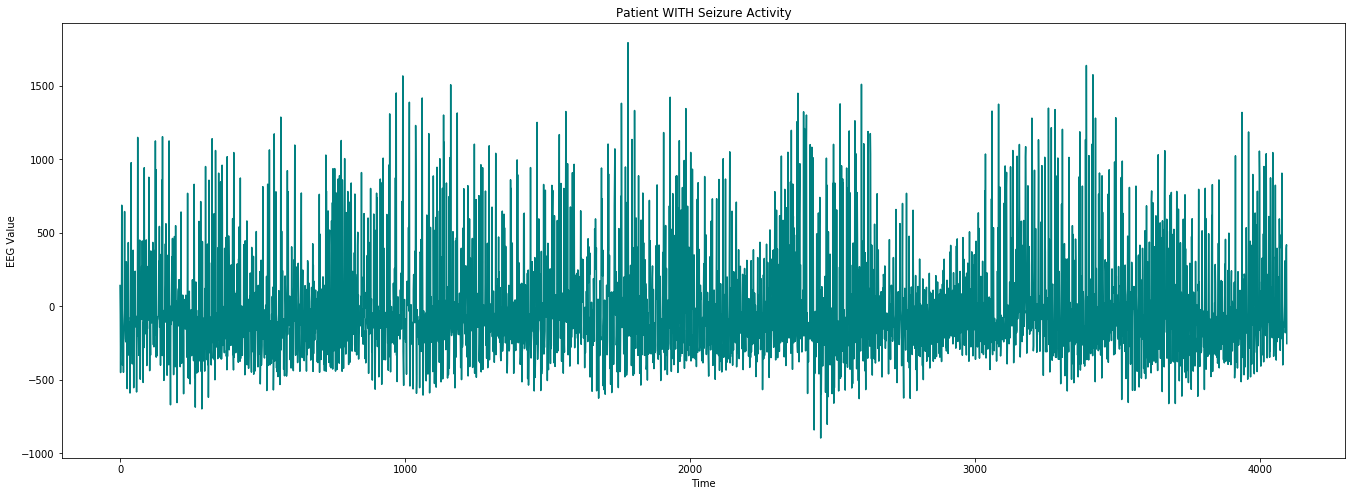

In [23]:
plt.figure(figsize=(23,8))
plt.plot(Xy[6,:],color='teal')
plt.title('Patient WITH Seizure Activity')
plt.ylabel('EEG Value')
plt.xlabel('Time')

# Scale the Data

In [15]:
#Check that the X data is not scaled
#Xx 

In [14]:
scaler = StandardScaler()
Xs = scaler.fit_transform(Xx)
X = pd.DataFrame(Xs,columns=Xx.columns)
#Check that X is now dataframe and scaled
#X

# Train Test Split

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Logisitc Regression

In [18]:
log_reg = LogisticRegression(random_state=42,solver='lbfgs',max_iter=500)

params={'C': [15,20,25,30]}

clf = GridSearchCV(log_reg,params,cv=5,verbose = 1, scoring = 'accuracy')

clf.fit(X_train, y_train)

DF=pd.DataFrame(clf.cv_results_)
DFF=DF[["param_C","mean_test_score","rank_test_score"]]
DFF #this shows little importance to C, best C value is 25

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    4.5s finished


,param_C,mean_test_score,rank_test_score
0,15,0.875,1
1,20,0.875,1
2,25,0.875,1
3,30,0.875,1


In [19]:
#Run model with Best C value found above, C=25
log_reg = LogisticRegression( C=25,random_state=42,solver='lbfgs')
log_reg.fit(X_train, y_train)

LogisticRegression(C=25, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [20]:
sc=log_reg.score(X_test, y_test)
print("The model's mean accuracy score on the test set it", sc)

The model's mean accuracy score on the test set it 0.88


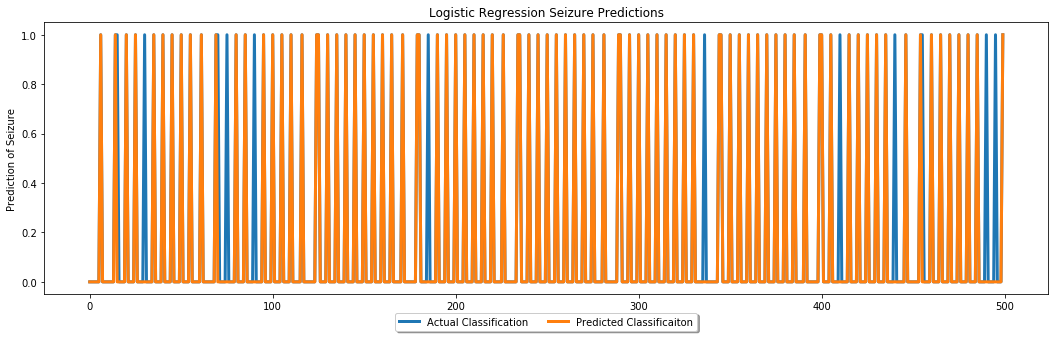

In [45]:
y_pred=np.around(log_reg.predict_proba(X))
y_pred=y_pred[:,1]
plt.figure(figsize=(18,5))
plt.plot(y,linewidth=3, label='Actual Classification')
plt.plot(y_pred,linewidth=3, label='Predicted Classificaiton')
plt.title('Logistic Regression Seizure Predictions')
plt.ylabel('Prediction of Seizure')
plt.xlabel('Observations')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),
          fancybox=True, shadow=True, ncol=2)

#blue line- true classification
#orange line prediction, so where you see the blue misclassificaiton 

# KNN

In [18]:
from sklearn.neighbors import KNeighborsClassifier

In [19]:
acc = []

for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    score = knn.score(X_test,y_test)
    acc.append(score)

Text(0, 0.5, 'Accuracy')

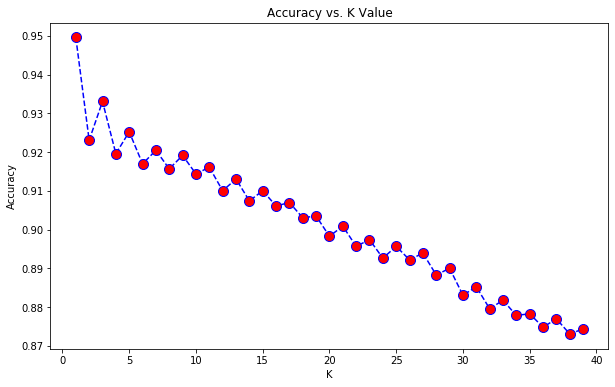

In [20]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Accuracy vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy')

In [21]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)
knn.score(X_test,y_test)

0.9495652173913044

In [22]:
pred=knn.predict(X_test)

In [23]:
from sklearn.metrics import classification_report,confusion_matrix

In [24]:
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

[[1832    3]
 [ 113  352]]
              precision    recall  f1-score   support

           0       0.94      1.00      0.97      1835
           1       0.99      0.76      0.86       465

    accuracy                           0.95      2300
   macro avg       0.97      0.88      0.91      2300
weighted avg       0.95      0.95      0.95      2300



In [25]:
acc = []

for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i,p=1)
    knn.fit(X_train,y_train)
    score = knn.score(X_test,y_test)
    acc.append(score)

Text(0, 0.5, 'Accuracy')

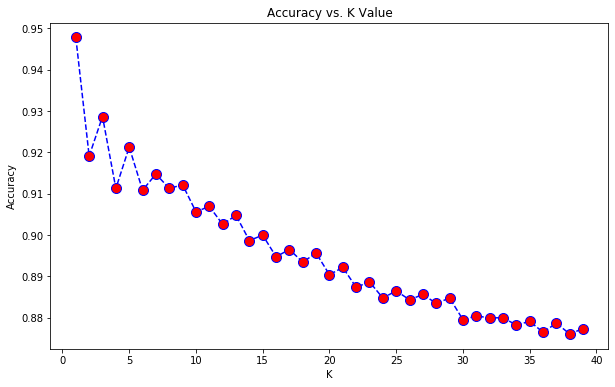

In [26]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Accuracy vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy')

In [27]:
knn = KNeighborsClassifier(n_neighbors=1,p=1)
knn.fit(X_train,y_train)
knn.score(X_test,y_test)

0.9478260869565217

In [28]:
pred=knn.predict(X_test)

In [29]:
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

[[1835    0]
 [ 120  345]]
              precision    recall  f1-score   support

           0       0.94      1.00      0.97      1835
           1       1.00      0.74      0.85       465

    accuracy                           0.95      2300
   macro avg       0.97      0.87      0.91      2300
weighted avg       0.95      0.95      0.94      2300



# Decision Tree

In [46]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

In [17]:
dtree=DecisionTreeClassifier(random_state=42)

dtree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=42, splitter='best')

In [18]:
predictions=dtree.predict(X_test)

In [19]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test,predictions))
print(confusion_matrix(y_test,predictions))

              precision    recall  f1-score   support

           0       0.88      0.97      0.93        77
           1       0.87      0.57      0.68        23

    accuracy                           0.88       100
   macro avg       0.87      0.77      0.81       100
weighted avg       0.88      0.88      0.87       100

[[75  2]
 [10 13]]


In [72]:
dtree=DecisionTreeClassifier(random_state=42,
                            max_depth=100,
                            min_samples_leaf=2)
dtree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=100,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=42, splitter='best')

In [20]:
dtree=DecisionTreeClassifier(random_state=42,
                            max_depth=100,
                            min_samples_leaf=2)
dtree.fit(X_train, y_train)
predictions=dtree.predict(X_test)
print(classification_report(y_test,predictions))
print(confusion_matrix(y_test,predictions))

              precision    recall  f1-score   support

           0       0.90      0.97      0.94        77
           1       0.88      0.65      0.75        23

    accuracy                           0.90       100
   macro avg       0.89      0.81      0.84       100
weighted avg       0.90      0.90      0.89       100

[[75  2]
 [ 8 15]]


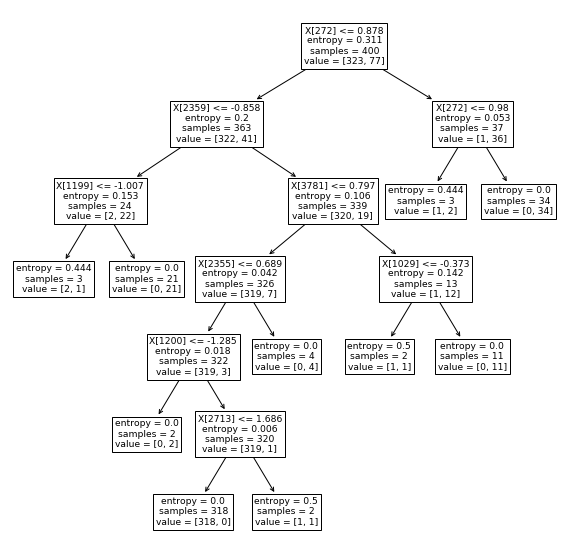

In [52]:
plt.figure(figsize=(10,10))
plot_tree(dtree);

# Random Forest

In [27]:
from sklearn.ensemble import RandomForestClassifier

In [28]:
rf=RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [29]:
rf_predictions=rf.predict(X_test)
print(classification_report(y_test,rf_predictions))
print(confusion_matrix(y_test,rf_predictions))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97        77
           1       1.00      0.83      0.90        23

    accuracy                           0.96       100
   macro avg       0.98      0.91      0.94       100
weighted avg       0.96      0.96      0.96       100

[[77  0]
 [ 4 19]]


In [30]:
rf=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=10, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.001, n_estimators=10,
                       n_jobs=10, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)
rf.fit(X_train, y_train)
rf_predictions=rf.predict(X_test)
print(classification_report(y_test,rf_predictions))
print(confusion_matrix(y_test,rf_predictions))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97        77
           1       1.00      0.83      0.90        23

    accuracy                           0.96       100
   macro avg       0.98      0.91      0.94       100
weighted avg       0.96      0.96      0.96       100

[[77  0]
 [ 4 19]]


In [38]:
#pip install pydot

Note: you may need to restart the kernel to use updated packages.


In [40]:
from sklearn.tree import export_graphviz
estimator=rf.estimators_[5]
# Export as dot file
export_graphviz(estimator, out_file='tree.dot', 
                rounded = True, proportion = False, 
                precision = 2, filled = True)
import pydot
(graph,) = pydot.graph_from_dot_file('tree.dot')
graph.write_png('tree.png')


# Convolutional Neural Network

## Convert to Numpy Arrays

In [21]:
train_y=y_train.values
train_X=X_train.values
test_y=y_test.values
test_X=X_test.values

## Add Dimensions

In [24]:
#y_train = y_train.reshape(y_train.shape + (1,))
train_X = train_X.reshape(train_X.shape + (1,))
train_X.reshape([-1,9200, 178,1])
#y_test = y_test.reshape(y_test.shape + (1,))
test_X = test_X.reshape(test_X.shape + (1,))

In [25]:
train_X.shape

(400, 4094, 1, 1)

## Build the Model

In [46]:
model = models.Sequential()
model.add(layers.Conv2D(4094, (1, 1), activation='relu', input_shape=(4094,1,1)))
model.add(layers.MaxPooling2D(pool_size=(1, 1),padding='same'))
model.add(layers.Conv2D(64, (1, 1), activation='relu'))
model.add(layers.MaxPooling2D((1, 1)))
model.add(layers.Conv2D(64, (1, 1), activation='relu'))

In [47]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [48]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 4094, 1, 4094)     8188      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 4094, 1, 4094)     0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 4094, 1, 64)       262080    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 4094, 1, 64)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4094, 1, 64)       4160      
_________________________________________________________________
flatten (Flatten)            (None, 262016)            0         
_________________________________________________________________
dense (Dense)                (None, 64)                1

## Compile and Train the Model

In [31]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_X, train_y, epochs=10, 
                    validation_data=(test_X, test_y))

Train on 400 samples, validate on 100 samples
Epoch 1/10
400/400 [==============================] - 639s 2s/sample - loss: 1.1187 - accuracy: 0.7225 - val_loss: 0.0994 - val_accuracy: 0.9600
Epoch 2/10
400/400 [==============================] - 604s 2s/sample - loss: 0.0543 - accuracy: 0.9775 - val_loss: 0.0504 - val_accuracy: 0.9700
Epoch 3/10
400/400 [==============================] - 583s 1s/sample - loss: 0.0194 - accuracy: 0.9950 - val_loss: 0.0375 - val_accuracy: 0.9900
Epoch 4/10
400/400 [==============================] - 553s 1s/sample - loss: 0.0029 - accuracy: 1.0000 - val_loss: 0.0412 - val_accuracy: 0.9800
Epoch 5/10
400/400 [==============================] - 571s 1s/sample - loss: 0.0020 - accuracy: 1.0000 - val_loss: 0.0656 - val_accuracy: 0.9900
Epoch 6/10
400/400 [==============================] - 542s 1s/sample - loss: 5.8456e-04 - accuracy: 1.0000 - val_loss: 0.0397 - val_accuracy: 0.9900
Epoch 7/10
400/400 [==============================] - 548s 1s/sample - loss: 2.0

## CNN Results

100/1 - 66s - loss: 0.0262 - accuracy: 0.9900


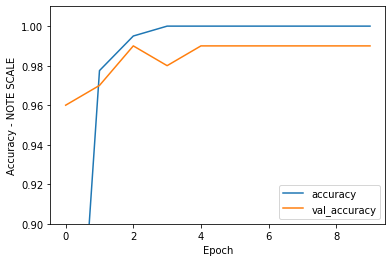

In [35]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy - NOTE SCALE')
plt.ylim([0.9, 1.01])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_X, test_y, verbose=2)

In [33]:
print(test_acc)

0.99
